In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_excel("./ENB2012_data.xlsx")

<Axes: >

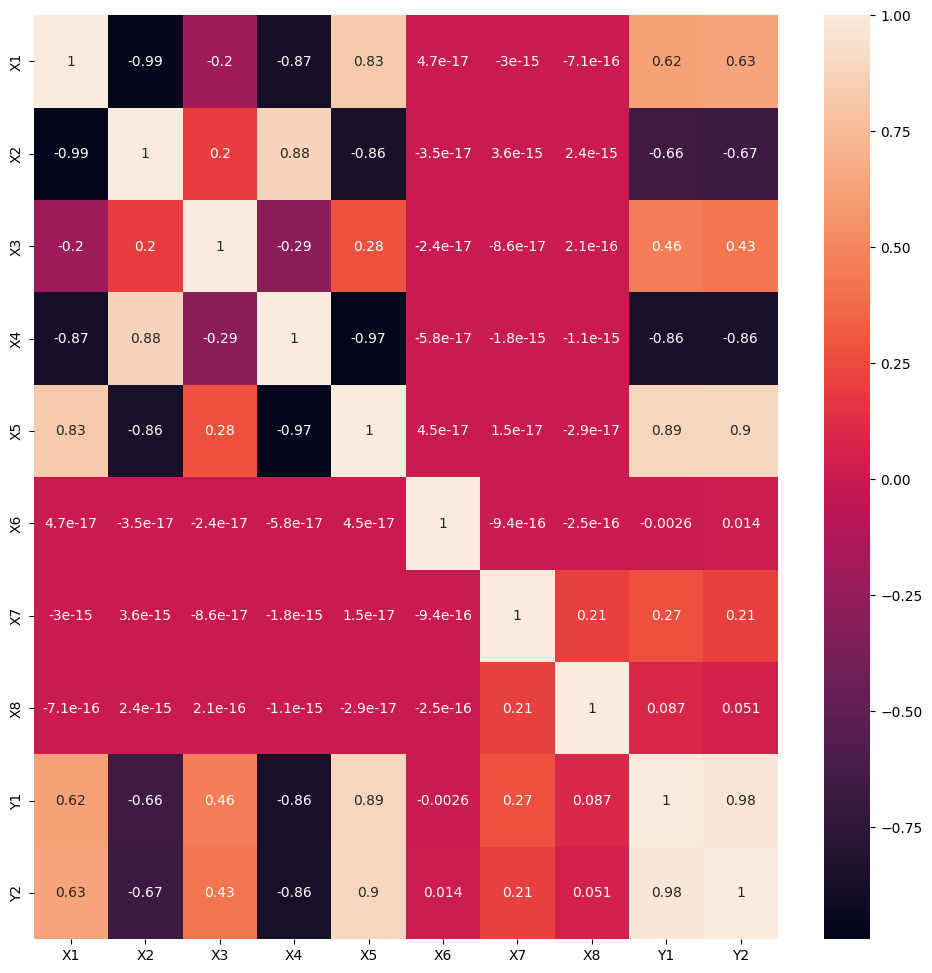

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

checking for multicollinearity


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# independent vars
indep = data[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

c:\Users\devbh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,X1,168.948751
1,X2,inf
2,X3,inf
3,X4,inf
4,X5,134.035782
5,X6,10.796725
6,X7,4.293656
7,X8,4.496320


successively remove features with highest vif value till remaning features show vif values less than 10

In [32]:
# independent vars
indep = data[["X1", "X3", "X4", "X5", "X6", "X7", "X8"]]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,X1,168.948751
1,X3,72.959435
2,X4,67.845322
3,X5,134.035782
4,X6,10.796725
5,X7,4.293656
6,X8,4.496320


In [33]:
# independent vars
indep = data[["X3", "X4", "X5", "X6", "X7", "X8"]]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,X3,54.201432
1,X4,21.962798
2,X5,20.782309
3,X6,10.691046
4,X7,4.285177
5,X8,4.486572


In [34]:
# independent vars
indep = data[["X4", "X5", "X6", "X7", "X8"]]

vif_data = pd.DataFrame()
vif_data["features"] = indep.columns

vif_data["VIF"] = [variance_inflation_factor(indep.values, i)
                          for i in range(len(indep.columns))]
vif_data

,features,VIF
0,X4,8.516175
1,X5,6.535844
2,X6,10.680472
3,X7,4.284329
4,X8,4.485596


VIF between all features is less than 10

## Training Scores

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, MultiTaskLassoCV
from sklearn.metrics import r2_score


X = data[["X4", "X5", "X6", "X7", "X8"]]
y = data[["Y1", "Y2"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
ridge_cv = RidgeCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]).fit(X_train, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test)

train_score_ridge_cv = ridge_cv.score(X_train, y_train)
test_score_ridge_cv = ridge_cv.score(X_test, y_test)
r2_ridge = r2_score(y_test, y_pred_ridge_cv)

print(f"RidgeCV Train Score: {train_score_ridge_cv}\nRidgeCV Test Score: {train_score_ridge_cv}")
print(f"R2 Score: {r2_ridge}")
print()

lasso_cv = MultiTaskLassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)
y_pred_lasso_cv = lasso_cv.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso_cv)

train_score_lasso_cv = lasso_cv.score(X_train, y_train)
test_score_lasso_cv = lasso_cv.score(X_test, y_test)

print(f"LassoCV Train Score: {train_score_lasso_cv}\nRidge Test Score: {test_score_lasso_cv}")
print(f"R2 Score: {r2_lasso}")

RidgeCV Train Score: 0.855767736157695
RidgeCV Test Score: 0.855767736157695
R2 Score: 0.8556794061889614

LassoCV Train Score: 0.8557346757422098
Ridge Test Score: 0.8554586590771536
R2 Score: 0.8554586590771536
